In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
images_input_folder = '/content/drive/MyDrive/sharpness_test_images/'




In [3]:
import cv2
import numpy as np

def laplacian_sharpness_map(gray_image, window_size=15):
    h, w = gray_image.shape
    pad = window_size // 2

    padded = cv2.copyMakeBorder(gray_image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    sharpness_map = np.zeros_like(gray_image, dtype=np.float32)

    for y in range(h):
        for x in range(w):
            window = padded[y:y + window_size, x:x + window_size]
            lap_var = cv2.Laplacian(window, cv2.CV_64F).var()
            sharpness_map[y, x] = lap_var

    sharpness_map = (sharpness_map - sharpness_map.min()) / (sharpness_map.max() - sharpness_map.min() + 1e-10)
    return sharpness_map


In [4]:
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(np.uint8(img * 255))


In [5]:
import matplotlib.pyplot as plt

def create_sharpness_heatmap(image_path, window_size=15, save_output=True):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sharp_map = laplacian_sharpness_map(gray, window_size)
    sharp_map_clahe = apply_clahe(sharp_map)
    heatmap = cv2.applyColorMap(sharp_map_clahe, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original")
    ax[0].axis('off')

    ax[1].imshow(heatmap[..., ::-1])
    ax[1].set_title("Sharpness Heatmap")
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Overlay")
    ax[2].axis('off')

    plt.show()

    if save_output:
        base_name = os.path.basename(image_path)
        heatmap_path = os.path.join(output_folder, f"heatmap_{base_name}")
        overlay_path = os.path.join(output_folder, f"overlay_{base_name}")
        cv2.imwrite(heatmap_path, heatmap)
        cv2.imwrite(overlay_path, overlay)
        print(f"Saved to {output_folder}")


Found 6 images.
Output will be saved to: /content/drive/MyDrive/sharpness_heatmaps/
Processing: image1.jpg


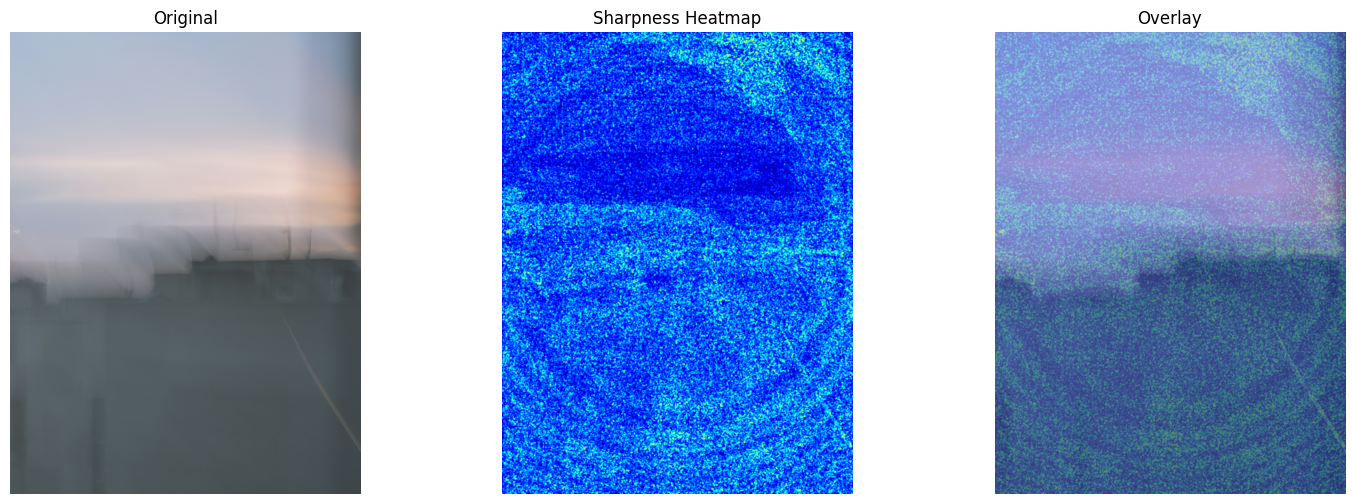

Saved to /content/drive/MyDrive/sharpness_heatmaps/
Processing: image2.jpg


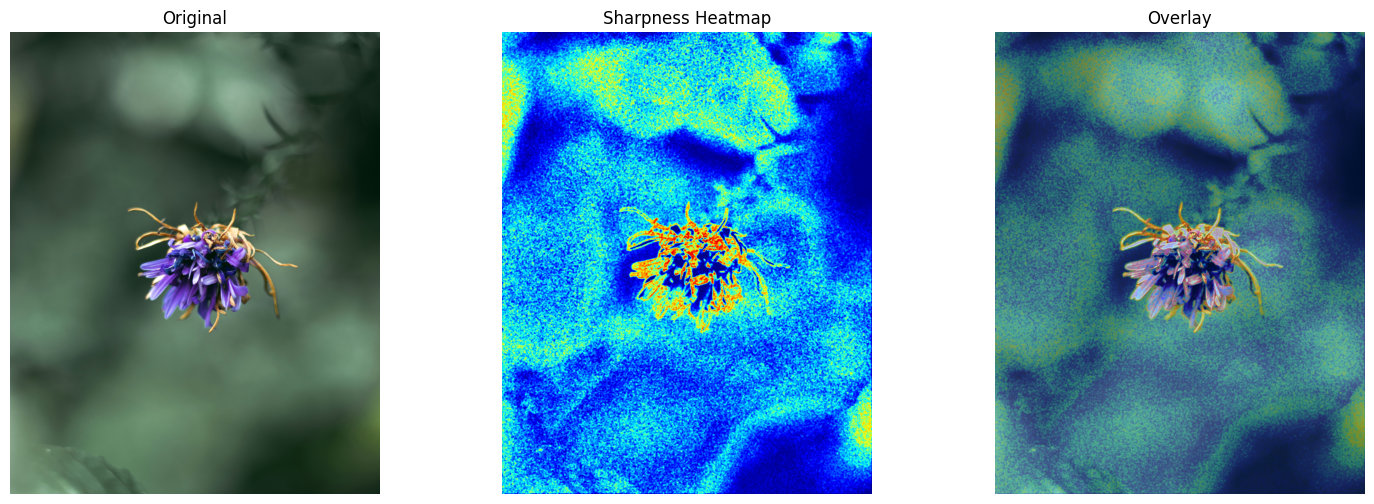

Saved to /content/drive/MyDrive/sharpness_heatmaps/
Processing: image3.jpg


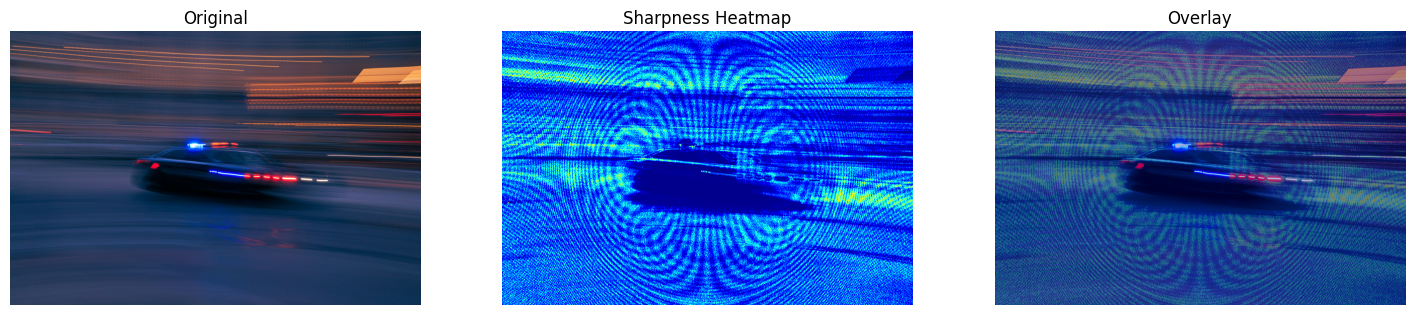

Saved to /content/drive/MyDrive/sharpness_heatmaps/
Processing: image4.jpg


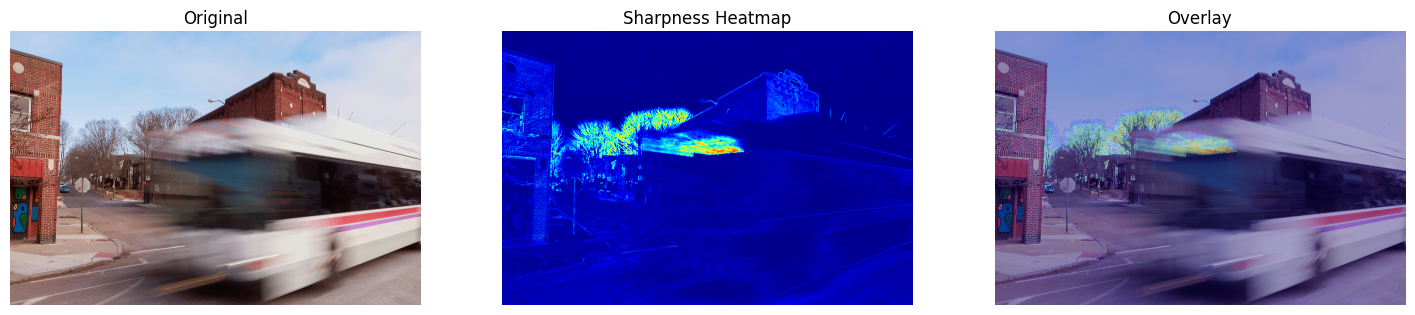

Saved to /content/drive/MyDrive/sharpness_heatmaps/
Processing: image5.jpg


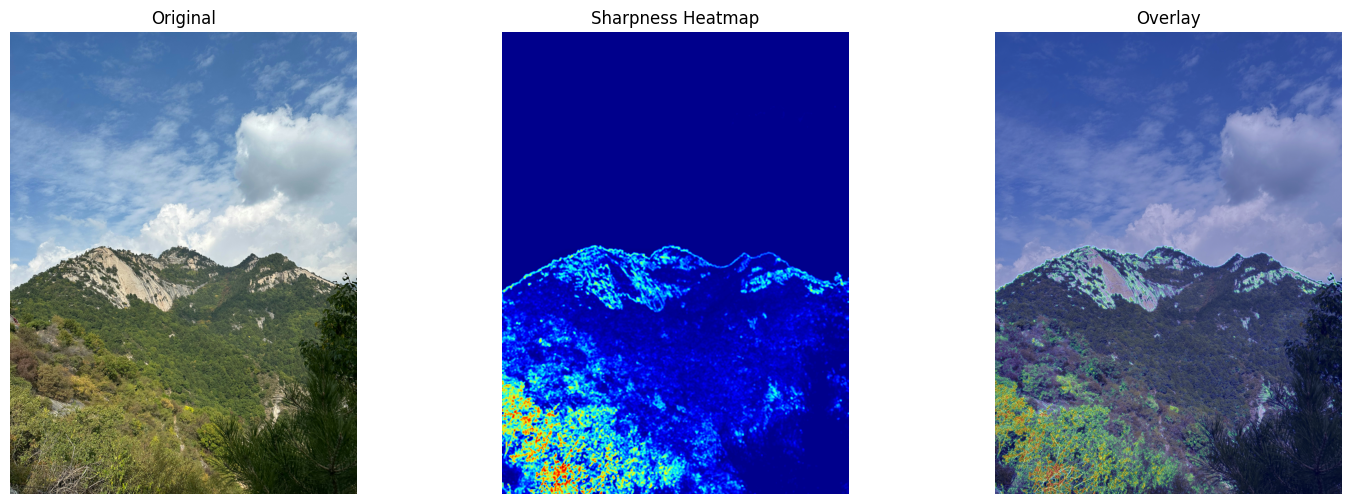

Saved to /content/drive/MyDrive/sharpness_heatmaps/
Processing: image6.jpg


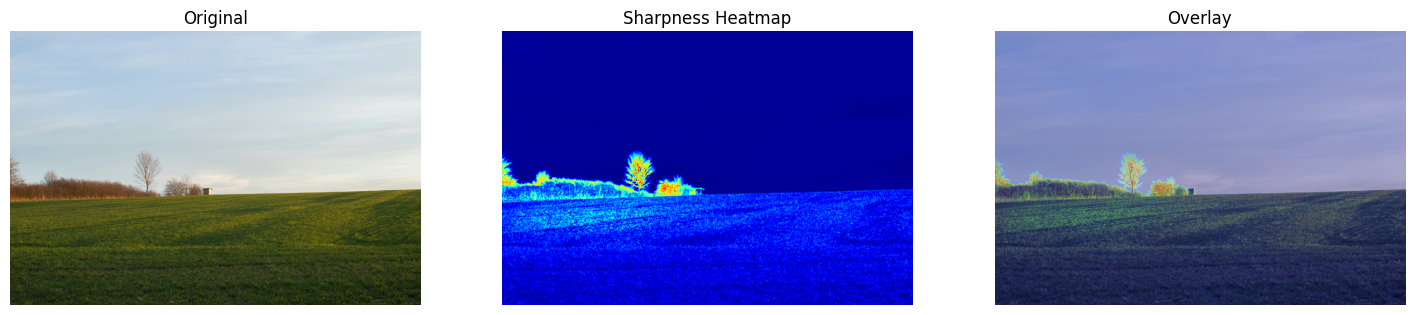

Saved to /content/drive/MyDrive/sharpness_heatmaps/


In [6]:
import glob
import os

image_paths = glob.glob(os.path.join(images_input_folder, '*.*'))
print(f"Found {len(image_paths)} images.")
output_folder = '/content/drive/MyDrive/sharpness_heatmaps/'

os.makedirs(output_folder, exist_ok=True)
print(f"Output will be saved to: {output_folder}")

for path in image_paths:
    print(f"Processing: {os.path.basename(path)}")
    create_sharpness_heatmap(path, window_size=15)